In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Importing the data stored as pickle file

data_for_model = pickle.load(open('/Users/praju/Desktop/DSI/Untitled Folder/abc_regression_modelling.p', "rb"))
#rb = reading a file rather than writing 'wb' as writing as a file.


In [3]:
data_for_model.head()

,customer_id,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,3.38,F,0.59,0.263,2563.71,297,44,5,58.266136
1,524,4.76,F,0.52,0.298,2996.02,357,49,5,61.143265
2,607,4.45,F,0.49,0.337,2853.82,350,49,5,58.241224
3,343,0.91,M,0.54,0.873,2388.31,272,54,5,44.227963
4,322,3.02,F,0.63,0.350,2401.64,278,50,5,48.032800


In [4]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 869
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             400 non-null    int64  
 1   distance_from_store     398 non-null    float64
 2   gender                  397 non-null    object 
 3   credit_score            398 non-null    float64
 4   customer_loyalty_score  400 non-null    float64
 5   total_sales             400 non-null    float64
 6   total_items             400 non-null    int64  
 7   transaction_count       400 non-null    int64  
 8   product_area_count      400 non-null    int64  
 9   average_basket_value    400 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 34.4+ KB


In [5]:
data_for_model.drop('customer_id',axis=1,inplace=True)

In [6]:
data_for_model.shape

(400, 9)

In [7]:
# Shuffle Data

# if there are unknown order in data i.e sorted by customer number i.e sorted in longer term customer 
# to newer customers, this may or may not have the impact on the model and easy way to make sure it does'nt is to 
# always shuffle our data

data_for_model = shuffle(data_for_model, random_state=42)

In [8]:
data_for_model.head(5)

,distance_from_store,gender,credit_score,customer_loyalty_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
455,0.28,M,0.81,0.889,990.65,243,53,4,18.691509
621,2.58,F,0.58,0.162,333.26,70,13,4,25.635385
64,0.80,M,0.80,0.956,1753.96,371,52,5,33.730000
456,0.16,M,0.56,0.926,929.57,225,51,4,18.226863
196,3.27,F,0.67,0.297,1904.55,376,36,3,52.904167


In [9]:
data_for_model.dropna(how='any', inplace=True)

In [10]:
data_for_model.isna().sum()

distance_from_store       0
gender                    0
credit_score              0
customer_loyalty_score    0
total_sales               0
total_items               0
transaction_count         0
product_area_count        0
average_basket_value      0
dtype: int64

In [11]:
# In decision tree no need to remove outliers
# decision tree make split decisions based on the data either side of a line
# they don't really care how far away a point is interms of the distance
# so removing outliers won't change anything at all



In [12]:
# splitting input & output variable

X = data_for_model.drop('customer_loyalty_score',axis=1)
y = data_for_model['customer_loyalty_score']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(315, 8)
(79, 8)
(315,)
(79,)


In [15]:
# decision tree still need data to be in numeric form

# deal with categorical input variable

categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False,drop='first') # sparse = False means
# it will return an array rather than a sparse matrix
# meaning array will be easier to visualize
# remove dummy variable for multicollinearity by using drop = first

X_train_encoded=one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded=one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded,columns=encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True),X_train_encoded.reset_index(drop=True)],axis=1)
X_train.drop(categorical_vars,axis=1,inplace=True)

X_test_encoded = pd.DataFrame(X_test_encoded,columns=encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True),X_test_encoded.reset_index(drop=True)],axis=1)
X_test.drop(categorical_vars,axis=1,inplace=True)

In [16]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [17]:
# no need feature selection in decision tree


# in decision tree each variable is judged independently
# so if there is'nt any predictive power within an input variable , it will essentially be just be ignored anyway
# in saying this, even though it is not strictly required , it is'nt necessarly a bad thing to do feature selection
# and thus remove some features
# if you are in a situation that have high number of input variables, reducing this to a subset that are strongly linked to
# the output or target variable will mean much less computation is required
# training & prediction must be quicker
# to summarize applying feature selection won't make any difference to the performance of the decision tree
# in terms of accuracy, but it could help with performance in terms of computation
# since we are dealing with small number of input variables here we are going to remove this section of applying feature
# selection.

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
r_squared = r2_score(y_test,y_pred)
print(r_squared)

0.8981805706349476


In [20]:
cv = KFold(n_splits=4,shuffle=True,random_state=42)

cv_scores1 = cross_val_score(regressor,X_train,y_train,cv=cv,scoring="r2")

print(cv_scores1.mean())

0.8715040553748037


In [21]:
num_data_points, num_input_vars = X_test.shape
adjusted_r_squared = 1 - (1-r_squared)  * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.8865440644217988


In [22]:
# you remember in decision tree, the model learns the patterns of the data so precisely
# sometimes struggles to apply those rules on new data
# so lets add one more thing section where we are assessing the accuracy of the model
# and this to investigate level of overfitting 

y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_train

# means perfectly predicting on training set
# i much rather that our model was generalizing somewhat
# As if i apply this model to some other real world data.. then maybe it would'nt hold up so well
# it did predict pretty well on test set, so we are not seeing anything majorly going on
# but sometimes its nice to know that it could handle data that did'nt quite fit the exact mould of the
# training data, so we can add parameters in when we instantiate our model 
# which will limit its splitting
# we apply max_depth = we only allow to split certain number of times for its required to stop



1.0

In [23]:
max_depth_list = list(range(1,9))
accuracy_scores = []

for depth in max_depth_list:
    regressor = DecisionTreeRegressor(max_depth=depth,random_state=42)
    regressor.fit(X_train,y_train)
    
    y_pred=regressor.predict(X_test)
    accuracy=r2_score(y_test,y_pred)
    accuracy_scores.append(accuracy)

print(accuracy_scores)


[0.48041516747913704, 0.749628862008641, 0.8434993278383679, 0.8666832224200037, 0.8909700995376669, 0.8905579006885826, 0.8990238112614182, 0.8941316438857448]


In [24]:
max_accuracy=max(accuracy_scores)
max_accuracy_index=accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_index]

print(max_accuracy)
print(max_accuracy_index)
print(optimal_depth)

0.8990238112614182
6
7


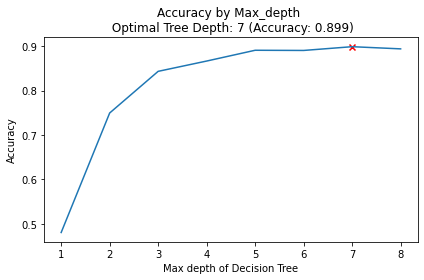

In [25]:
# plot of max_depths

plt.plot(max_depth_list,accuracy_scores)
plt.scatter(optimal_depth,max_accuracy,marker='x',color='red')
plt.title(f"Accuracy by Max_depth \n Optimal Tree Depth: {optimal_depth} (Accuracy: {round(max_accuracy,4)})")
plt.xlabel("Max depth of Decision Tree")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

Here we can see the accuracy over different max_depth that were applied and we can see
the optimal depth is at 'x' point which is 7 and i really want a good and also want a model that
will generalize well. so i'm gonna refit our model with max_depth of 4.. we might loose tiny bit of accuracy here
but would end up much simpler model to explain it to our stakeholders and it should also generalize really well on any new data that it receives.

**so lets re-fit our model with max depth of 4**

i've refitted the model with depth of 4 and it has accuracy of 0.86 rather than 0.89

In [26]:
regressor = DecisionTreeRegressor(max_depth=4,random_state=42)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [27]:
y_pred = regressor.predict(X_test)

In [28]:
r_squared = r2_score(y_test,y_pred)
print(r_squared)

0.8666832224200037


In [29]:

y_train_pred = regressor.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.9059473785182592

In [30]:
num_data_points, num_input_vars = X_test.shape
adjusted_r_squared = 1 - (1-r_squared)  * (num_data_points - 1) / (num_data_points - num_input_vars - 1)
print(adjusted_r_squared)

0.8514470192680041


In [31]:
cv = KFold(n_splits=4,shuffle=True,random_state=42)

cv_scores1 = cross_val_score(regressor,X_train,y_train,cv=cv,scoring="r2")

print(cv_scores1.mean())

0.8046471635623549


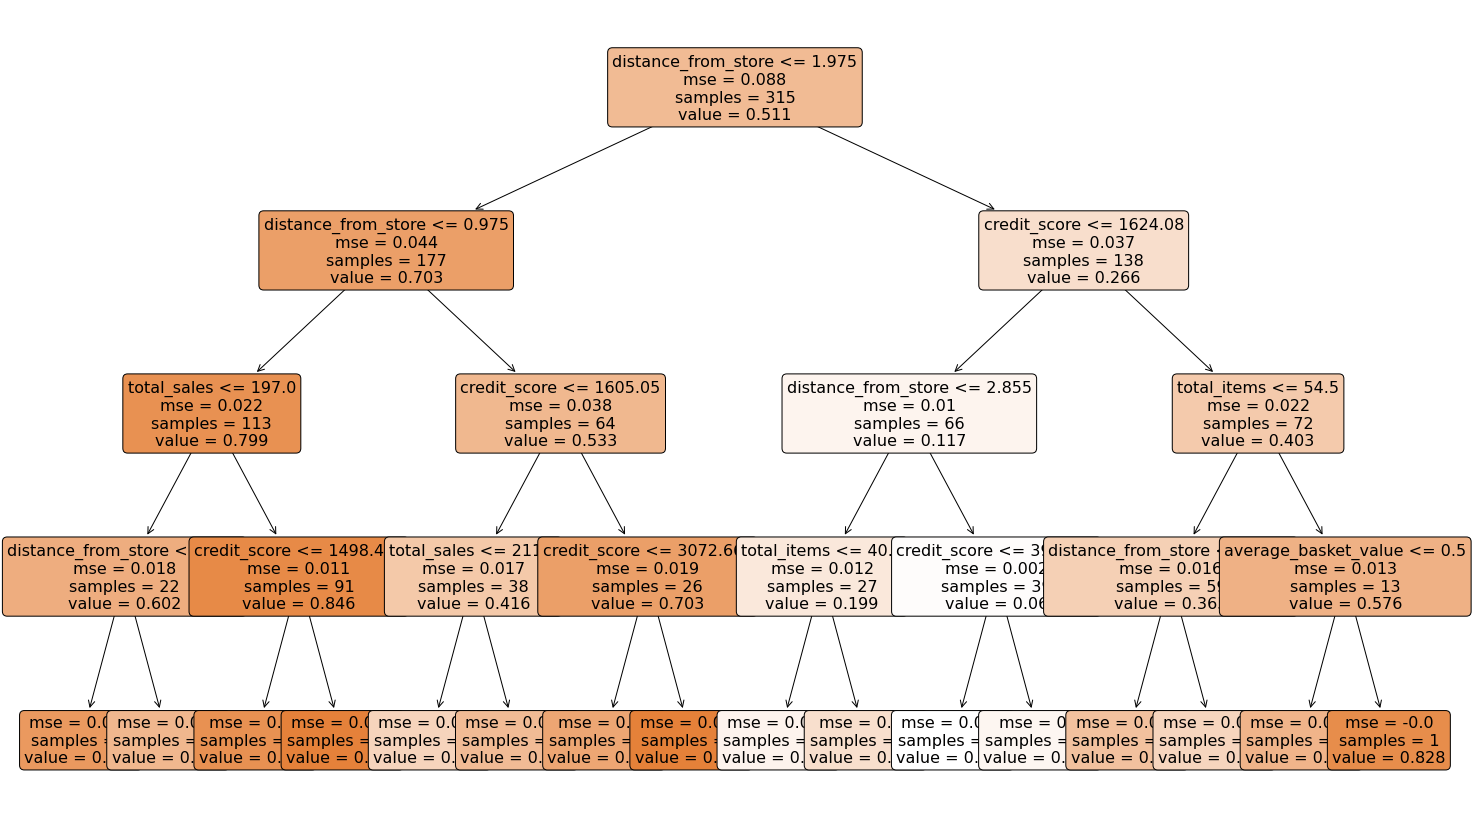

In [32]:
# lets plot our model
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25,15))
tree = plot_tree(regressor, feature_names=X.columns,filled=True,rounded=True,fontsize=16)

the first thing to see here is the "distance_from_store" is the first split.. so it is very important for 
loyalty score


In [44]:
# i think we made big task of predicting loyalty_scores as you saw our decision tree was actually able to
# predict the loyalty scores better than linear regression with a really impressive r2 score of around 0.9
# in some cases they won't be able to generate the accuracy as other models as they are simplistic approaches
# but what they lack in predictive power can be made up for their "Interpretability" which can be so important
# when selling models in management & stakeholders

In [43]:
y_train

count    315.000000
mean       0.511381
std        0.296527
min        0.002000
25%        0.266000
50%        0.512000
75%        0.773000
max        0.998000
Name: customer_loyalty_score, dtype: float64

In [53]:
X_train[X_train['distance_from_store']>1.975].describe()

,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,3.664855,0.597391,2155.414565,296.789855,41.000000,4.224638,43.639198,0.036232
std,3.619584,0.101653,2179.934547,257.792891,24.110149,0.773825,22.592982,0.187547
min,1.990000,0.360000,46.710000,13.000000,4.000000,2.000000,9.342000,0.000000
25%,2.632500,0.522500,371.227500,89.250000,13.000000,4.000000,26.785431,0.000000
50%,3.260000,0.595000,1700.410000,288.000000,46.500000,4.000000,37.836828,0.000000
75%,3.910000,0.667500,2626.097500,343.000000,51.000000,5.000000,55.635878,0.000000
max,44.370000,0.840000,9878.760000,1187.000000,108.000000,5.000000,102.335417,1.000000
